## Problem 4 : Using MATLAB or Python, repeat the process outlined in the previous slides.


### (a) Image of the whole body bone scan

d:\python36\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


(-0.5, 499.5, 799.5, -0.5)

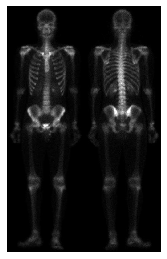

In [2]:
# import necessary libraries and read the image
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
skeleton = io.imread("D:/EE267/skeleton.tif")
io.imshow("D:/EE267/skeleton.tif")
plt.axis("off")

### (b) Laplacian of (a)

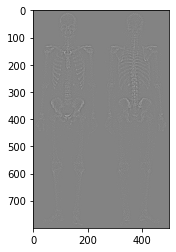

In [4]:
from skimage import filters

laplace_skeleton = filters.laplace(skeleton,ksize=3)
plt.imshow(laplace_skeleton,cmap=plt.cm.gray)

### (c) Sharpened image obtained by adding (a) and (b)

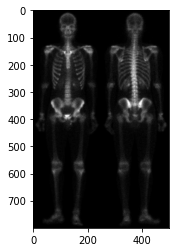

In [17]:
# add the original image and laplacian image to get a sharpened image
sharpened_skeleton = skeleton + laplace_skeleton
plt.imshow(sharpened_skeleton,cmap=plt.cm.gray)

### (d) Sobel gradient of image (a)

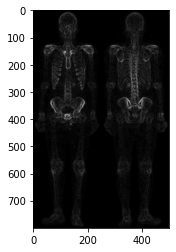

In [18]:
# apply sobel operator to original image
from skimage import filters

sobel_skeleton = filters.sobel(skeleton)
plt.imshow(sobel_skeleton,cmap=plt.cm.gray)

### (e) Sobel image smoothed with a 5 × 5 box filter

<ipython-input-19-d8c04d4f7765>:5: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  sobel_mean_skeleton = filters.rank.mean(sobel_skeleton,footprint=footprint)


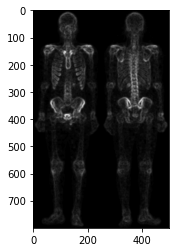

In [19]:
# create a 5 x 5 mean filter anfd apply it over the sobel filtered image
from skimage import morphology

footprint = morphology.square(5)
sobel_mean_skeleton = filters.rank.mean(sobel_skeleton,footprint=footprint)
plt.imshow(sobel_mean_skeleton,cmap=plt.cm.gray)

### (f) Mask image formed by the product of (b) and (e). 

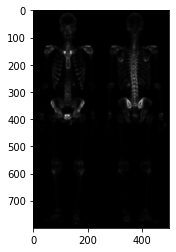

In [35]:
# multiply the sharpened image formed by addition and the sobel filtered image 
mask_skeleton = sharpened_skeleton * sobel_mean_skeleton
#io.imshow(mask_skeleton)
plt.imshow(mask_skeleton,cmap=plt.cm.gray)

### (g) Sharpened image obtained by the adding images (a) and (f). 

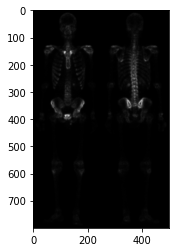

In [36]:
# create a sharpened image  by adding original image and above masked image 
sharpened1_skeleton = skeleton + mask_skeleton
plt.imshow(sharpened1_skeleton,cmap=plt.cm.gray)

### (h) Final result obtained by applying a powerlaw transformation to (g)

(-0.5, 499.5, 799.5, -0.5)

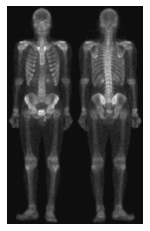

In [46]:
# applying power law transformation to the above image
from skimage import exposure


rescale_skeleton = exposure.rescale_intensity(sharpened1_skeleton,out_range=(0,255))
gamma_skeleton = exposure.adjust_gamma(rescale_skeleton,gamma=0.29)
plt.imshow(gamma_skeleton,cmap=plt.cm.gray)
plt.axis("off")